# Projeto 2 - Investigando os dados de sobreviventes do Titanic

Dados do Titanic - contém dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic.


In [394]:
# Realizando imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [395]:
# Carregando dataset
titanic_df = pd.read_csv("titanic-data-6.csv")

In [396]:
# Visualizando os primeiros elementos do dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
# Investigando os tipos de dados encontrados no dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Analisando tamanho da matriz de dados

In [398]:
# verificando tamanho dos dados
titanic_df.shape

(891, 12)

Analisando se existem dados duplicados

In [399]:
# verificando por dados duplicados
sum(titanic_df.duplicated())

0

Verificando se existem linhas com valores nullos

In [400]:
# verificando por colunas com dados em brancos ou nulos
titanic_df.columns[titanic_df.isnull().any()].values

array(['Age', 'Cabin', 'Embarked'], dtype=object)

As colunas age, cabin e Embarked possuem valores nullos

Para a exploração dos dados desse dataset será necessário normalizar os valores da coluna 'Age' que representa a idades dos passageiros.

Analisando a quantidade de valores nulos

In [401]:
titanic_df['Age'].isnull().sum()

177

Normalizando coluna

In [402]:
def normalizeAGE(value):
    if value < 1.0:
        return 1.0
    return value

titanic_df['Age'] = titanic_df['Age'].apply(normalizeAGE)

In [403]:
# Encontrando a idade média
age_mean = titanic_df['Age'].mean()
print(age_mean)

29.701680672268907


Preenchendo os dados nulos com a idade média dos passageiros

In [404]:
titanic_df['Age'].fillna(age_mean, inplace = True)

Verificando se ainda existem dados nulos para a coluna 'Age'

In [405]:
# Verificando que todos os dados nullos foram preenchidos
titanic_df['Age'].isnull().sum()

0

In [406]:
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [407]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


In [408]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.552189,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,12.996210,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1 - Pergunta : Quantos pessoas sobreviveram e quantas não sobreviveram

Através da análise podemos concluir que 549 não sobreviveram e 342 sobreviveram


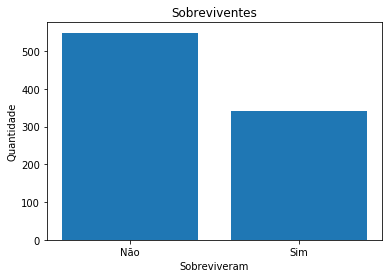

In [409]:
sobreviventes = titanic_df.groupby(['Survived'])
locations = [1, 2]
heights = sobreviventes['Age'].count()
labels = ['Não', 'Sim']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');
               
print('Através da análise podemos concluir que {0} não sobreviveram e {1} sobreviveram'
      .format(sobreviventes['Age'].count()[0], sobreviventes['Age'].count()[1]))


## 2 - Pergunta - Qual foi a quantidade de homens que sobreviveram.

Através da análise podemos concluir apenas 109 homens sobreviveram e 468 não sobreviveram


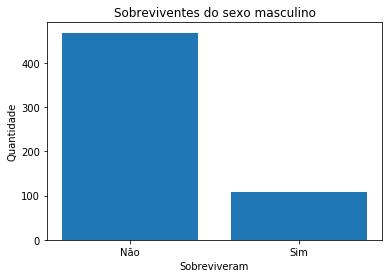

In [410]:
male_survived = titanic_df[titanic_df['Sex'] == "male"]["Survived"]
#print(male_survived.value_counts())

locations = [1, 2]
heights = male_survived.value_counts()
labels = ['Não', 'Sim']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes do sexo masculino')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');


print('Através da análise podemos concluir apenas {0} homens sobreviveram e {1} não sobreviveram'
      .format(male_survived.value_counts()[1], male_survived.value_counts()[0]))

## 3 - Pergunta - Qual foi a quantidade de mulheres que sobreviveram.

1    233
0     81
Name: Survived, dtype: int64
Através da análise podemos concluir apenas 233 mulheres sobreviveram e 81 não sobreviveram


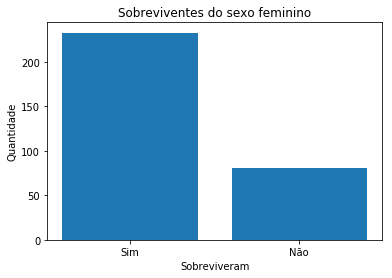

In [411]:
female_survived = titanic_df[titanic_df['Sex'] == "female"]["Survived"]
print(female_survived.value_counts())

locations = [1, 2]
heights = female_survived.value_counts()
labels = ['Sim', 'Não']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes do sexo feminino')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');


print('Através da análise podemos concluir apenas {0} mulheres sobreviveram e {1} não sobreviveram'
      .format(female_survived.value_counts()[1], female_survived.value_counts()[0]))

Referências :

http://minerandodados.com.br/index.php/2017/09/01/cafe-com-codigo-tratando-valores-faltantes-pandas-python/
https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93
https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1
https://www.vooo.pro/insights/12-tecnicas-pandas-uteis-em-python-para-manipulacao-de-dados/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
https://matplotlib.org/users/pyplot_tutorial.html